<a href="https://colab.research.google.com/github/chloepark627/tensorflow_ex/blob/master/ch07_RNN(7_2_layers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
X = list(); Y = list();
for i in range(6):
    lst = list(range(i, i+4)) 
    #0 / 0,1,2,3
    print('i : ', lst, i+4)

    x = list(map(lambda c:[c/10], lst))
    y = (i+4)/10
    X.append(x)
    Y.append(y)

    print('X : ', x)
    print('Y : ', y)
    print()

i :  [0, 1, 2, 3] 4
X :  [[0.0], [0.1], [0.2], [0.3]]
Y :  0.4

i :  [1, 2, 3, 4] 5
X :  [[0.1], [0.2], [0.3], [0.4]]
Y :  0.5

i :  [2, 3, 4, 5] 6
X :  [[0.2], [0.3], [0.4], [0.5]]
Y :  0.6

i :  [3, 4, 5, 6] 7
X :  [[0.3], [0.4], [0.5], [0.6]]
Y :  0.7

i :  [4, 5, 6, 7] 8
X :  [[0.4], [0.5], [0.6], [0.7]]
Y :  0.8

i :  [5, 6, 7, 8] 9
X :  [[0.5], [0.6], [0.7], [0.8]]
Y :  0.9



In [2]:
import numpy as np

X = np.array(X); Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

print(X[i].shape)

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9
(4, 1)


In [3]:
# 7.2.1 SimpleRNN Layer

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.36052918]
 [0.5225967 ]
 [0.6476349 ]
 [0.73791057]
 [0.80008644]
 [0.8408473 ]]


In [5]:
print(model.predict(np.array([[[-0.1], [0], [0.1], [0.2]]])))

[[0.16963908]]


In [8]:
lst = np.random.rand(100) #100 numbers of btwn 0 and 1
idx = np.random.choice(100, 2, replace=False)
print(lst[idx], np.prod(lst[idx]))

[0.82784223 0.18423529] 0.15251775743723972


In [10]:
# 7.2.2 LSTM Layer

X = list(); Y = list();

for i in range(3000):
    lst = np.random.rand(100) #100 numbers of btwn 0 and 1
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1 #only two numbers are 1 in 100 float numbers

    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx])) #product

print(X[0], Y[0])

[[1.         0.67346542]
 [0.         0.91945458]
 [0.         0.25189539]
 [0.         0.77951969]
 [0.         0.05633922]
 [0.         0.74434558]
 [0.         0.13132366]
 [0.         0.21101997]
 [0.         0.42956589]
 [0.         0.6955504 ]
 [0.         0.39597529]
 [0.         0.73913595]
 [0.         0.48226698]
 [0.         0.81854935]
 [0.         0.51340471]
 [0.         0.30925662]
 [0.         0.37221106]
 [0.         0.33261483]
 [0.         0.53220881]
 [0.         0.63012958]
 [0.         0.7514029 ]
 [0.         0.33425765]
 [0.         0.36728028]
 [0.         0.45820504]
 [0.         0.19149512]
 [0.         0.56034916]
 [0.         0.72768814]
 [0.         0.90854552]
 [0.         0.51555174]
 [0.         0.51808017]
 [0.         0.22845314]
 [0.         0.5378713 ]
 [0.         0.43359933]
 [0.         0.84407926]
 [0.         0.69613397]
 [0.         0.70882779]
 [0.         0.6635488 ]
 [0.         0.38144774]
 [0.         0.32037656]
 [0.         0.69423803]


In [0]:
# SimpleRNN

model = tf.keras.Sequential([   
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2] ), #레이어의 출력을 다음 레이어로 그대로 넘김
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1) #곱셈결과 1개만 출력
])

In [12]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(3000, 100, 2) (3000,)


In [0]:
train_X = X[:2560]
train_Y = Y[:2560]
text_X = X[2560:]
text_Y = Y[2560:]

In [16]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
60/60 [==============================] - 5s 83ms/step - loss: 0.0429 - val_loss: 0.0574
Epoch 2/25
60/60 [==============================] - 5s 81ms/step - loss: 0.0415 - val_loss: 0.0553
Epoch 3/25
60/60 [==============================] - 5s 80ms/step - loss: 0.0411 - val_loss: 0.0543
Epoch 4/25
60/60 [==============================] - 5s 80ms/step - loss: 0.0407 - val_loss: 0.0582
Epoch 5/25
60/60 [==============================] - 5s 82ms/step - loss: 0.0423 - val_loss: 0.0561
Epoch 6/25
60/60 [==============================] - 5s 80ms/step - loss: 0.0401 - val_loss: 0.0568
Epoch 7/25
60/60 [==============================] - 5s 82ms/step - loss: 0.0392 - val_loss: 0.0569
Epoch 8/25
60/60 [==============================] - 5s 87ms/step - loss: 0.0390 - val_loss: 0.0567
Epoch 9/25
60/60 [==============================] - 5s 84ms/step - loss: 0.0383 - val_loss: 0.0576
Epoch 10/25
60/60 [==============================] - 5s 82ms/step - loss: 0.0379 - val_loss: 0.0586
Epoch 11/

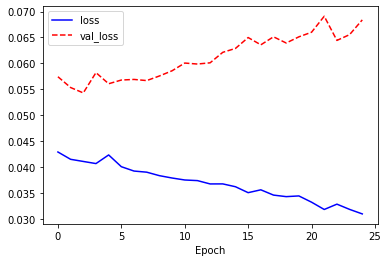

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [18]:
model.evaluate(text_X, text_Y)

14/14 [==============================] - 0s 14ms/step - loss: 0.0614


0.06142017990350723

In [21]:
# 5개의 테스트데이터로 예측
prediction = model.predict(text_X[:5])
for i in range(5):
    print(text_Y[i], '\t', predictions[i], '\t diff : ', abs(prediction[i][0] - text_Y[i]))

0.35184474015775763 	 [0.41327676] 	 diff :  0.061432021612490784
0.18696854961307102 	 [0.3889612] 	 diff :  0.20199264633266872
0.1594355142118077 	 [0.32419938] 	 diff :  0.1647638642786403
0.8095629081168317 	 [0.09277081] 	 diff :  0.7167921006717825
0.2968040470125039 	 [0.5305727] 	 diff :  0.23376866540891333


In [23]:
# simpleRNN 정확도 : 너무 낮음(약10%)

prediction = model.predict(text_X)
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - text_Y[i]) > 0.04:
        fail += 1

print('Accuracy : ', (len(prediction)-fail)/len(prediction)*100)

Accuracy :  11.59090909090909


In [30]:
# LSTM

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.25)

Epoch 1/100
60/60 [==============================] - 1s 18ms/step - loss: 0.0504 - val_loss: 0.0494
Epoch 2/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0495 - val_loss: 0.0498
Epoch 3/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0493 - val_loss: 0.0494
Epoch 4/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0498 - val_loss: 0.0499
Epoch 5/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0494 - val_loss: 0.0518
Epoch 6/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0491 - val_loss: 0.0495
Epoch 7/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0498 - val_loss: 0.0495
Epoch 8/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0490 - val_loss: 0.0498
Epoch 9/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0491 - val_loss: 0.0497
Epoch 10/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0490 - val_loss: 0.0497

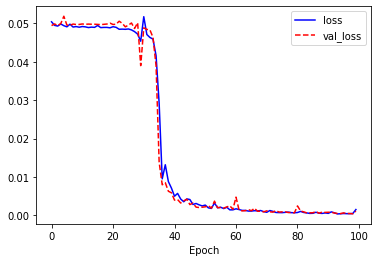

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
# LSTM 정확도 : simpleRNN보다 높음

prediction = model.predict(text_X)
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - text_Y[i]) > 0.04:
        fail += 1

print('Accuracy : ', (len(prediction)-fail)/len(prediction)*100)

Accuracy :  78.18181818181819


In [34]:
# 7.2.3 GRU Layer
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.25)

Epoch 1/100
60/60 [==============================] - 1s 20ms/step - loss: 0.0525 - val_loss: 0.0497
Epoch 2/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0505 - val_loss: 0.0560
Epoch 3/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0500 - val_loss: 0.0502
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0490 - val_loss: 0.0498
Epoch 5/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0496 - val_loss: 0.0503
Epoch 6/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0492 - val_loss: 0.0504
Epoch 7/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0494 - val_loss: 0.0502
Epoch 8/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0489 - val_loss: 0.0500
Epoch 9/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0489 - val_loss: 0.0519
Epoch 10/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0487 - val_loss: 0.0496

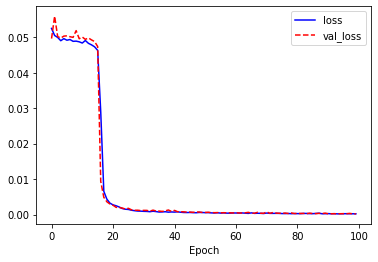

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [38]:
# GRU 정확도 

prediction = model.predict(text_X)
fail = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - text_Y[i]) > 0.04:
        fail += 1

print('Accuracy : ', (len(prediction)-fail)/len(prediction)*100)

Accuracy :  99.54545454545455
